# The MNIST  
database (Modified National Institute of Standards and Technology) of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.  
This set has been studied so much that is often called the "Hello World" of Machine Learning.

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure includ‐
ing:  
• A **DESCR** key describing the dataset  
• A **data** key containing an array with one row per instance and one column per
feature  
• A **target** key containing an array with the labels

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 = 784 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).  
Let’s take a peek at one digit from the dataset. All you need to do is :  
1. grab an instance’s feature vector, 
2. reshape it to a 28×28 array, and 
3. display it using Matplotlib’s imshow() function:

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
some_digit = X[0] # one row

In [9]:
some_digit_image = some_digit.reshape(28,28)

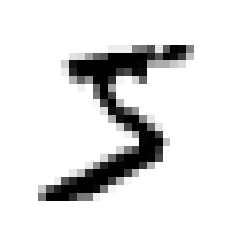

In [10]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [11]:
y[0] #5

'5'

Note that the label is a string. We prefer numbers, so lets cast y to integer.

In [12]:
import numpy as np
y = y.astype(np.uint8)

You should always create a test set and set it aside before inspecting the data
closely. The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [13]:
X_train, X_test,y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
len(X_train[0])

784

# Training a Binary Classifier
Let’s simplify the problem for now and only try to identify one digit - for example,
the number 5.   This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:  

In [15]:
#y ist array with all the labels
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

We will pick the Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.  
Let’s create
an SGDClassifier and train it on the whole training set:

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right
in this particular case! Now, let’s evaluate this model’s performance.
# Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor.

Let’s use the cross_val_score() function to evaluate your SGDClassifier model
using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the
remaining folds 

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train,y_train_5, cv=3, scoring="accuracy")

array([0.96355, 0.93795, 0.95615])

Be careful here. Even though we achive 93% accuracy, its not that amazing as we would like to think.  
If we have a classifier that just classifies every single image in the “not-5” class, we will achive 90% accuracy.  
This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time.  
**This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).**